In [1]:
# It is regression problem:-
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/Admission_Predict_Ver1.csv")

In [4]:
df.shape

(500, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# in case there is no null value or all the columns in the int or float 

In [7]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# in case data is vary so we use scalling processor :-
#"MIN-MAX" scaling-- in case we no Upper as well as Lower bound so we can easily use the "min-max scaling"
# Structure --> 7 input and hidden layer 7 perceptron and output single node

In [9]:
# there is no need of "Serial no."
df.drop(columns = ['Serial No.'],inplace = True)

In [10]:
df.head(2)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76


In [11]:
# now split the data into train and test and then we use min-max scalling
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [12]:
print(X)
print(y)

     GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research
0          337          118                  4  4.5   4.5  9.65         1
1          324          107                  4  4.0   4.5  8.87         1
2          316          104                  3  3.0   3.5  8.00         1
3          322          110                  3  3.5   2.5  8.67         1
4          314          103                  2  2.0   3.0  8.21         0
..         ...          ...                ...  ...   ...   ...       ...
495        332          108                  5  4.5   4.0  9.02         1
496        337          117                  5  5.0   5.0  9.87         1
497        330          120                  5  4.5   5.0  9.56         1
498        312          103                  4  4.0   5.0  8.43         0
499        327          113                  4  4.5   4.5  9.04         0

[500 rows x 7 columns]
0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496 

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state = 1)

In [14]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [15]:
# min-max scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
X_train_scaled

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [30]:
# to build neural network arcitecture
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [31]:
model = Sequential()

model.add(Dense(7,activation = 'relu',input_dim = 7))   # 7 nodes in the hidden layer and 7 input node 
model.add(Dense(7,activation = 'relu'))  # add 7 node in new hidden layer
model.add(Dense(1,activation = 'linear'))


In [32]:
""" activation function
1) "Softmax" -- classification data which contain more than 1 node
2) "linear" --- regression data  single output layer node 
"""

' activation function\n1) "Softmax" -- classification data which contain more than 1 node\n2) "linear" --- regression data  single output layer node \n'

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 7)                 56        
                                                                 
 dense_8 (Dense)             (None, 7)                 56        
                                                                 
 dense_9 (Dense)             (None, 1)                 8         
                                                                 
Total params: 120
Trainable params: 120
Non-trainable params: 0
_________________________________________________________________


In [36]:
# structure --> compile --> fit 
model.compile(loss = 'mean_squared_error',optimizer='Adam')

In [37]:
history = model.fit(X_train_scaled,y_train, epochs = 80, validation_split=0.20)

Epoch 1/80
10/10 [==============================] - 1s 25ms/step - loss: 0.5175 - val_loss: 0.5295
Epoch 2/80
10/10 [==============================] - 0s 6ms/step - loss: 0.4591 - val_loss: 0.4730
Epoch 3/80
10/10 [==============================] - 0s 7ms/step - loss: 0.4051 - val_loss: 0.4206
Epoch 4/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3572 - val_loss: 0.3726
Epoch 5/80
10/10 [==============================] - 0s 6ms/step - loss: 0.3154 - val_loss: 0.3295
Epoch 6/80
10/10 [==============================] - 0s 5ms/step - loss: 0.2782 - val_loss: 0.2885
Epoch 7/80
10/10 [==============================] - 0s 6ms/step - loss: 0.2411 - val_loss: 0.2448
Epoch 8/80
10/10 [==============================] - 0s 5ms/step - loss: 0.1967 - val_loss: 0.1927
Epoch 9/80
10/10 [==============================] - 0s 5ms/step - loss: 0.1447 - val_loss: 0.1318
Epoch 10/80
10/10 [==============================] - 0s 5ms/step - loss: 0.0946 - val_loss: 0.0784
Epoch 11/80
10/10 

In [38]:
# predict the model
y_pred = model.predict(X_test_scaled)

4/4 [==============================] - 0s 3ms/step


In [39]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.698278698960155

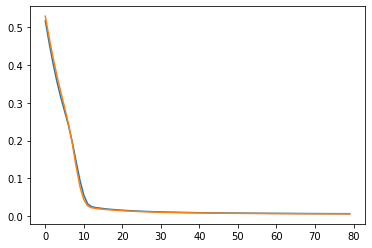

In [42]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [43]:
# we can imporvize our accuracy by using the :- epochs, increase the node in the input, output, in hidden layer or we can also increase the hidden layer